In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import time
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# On met le type des images en float.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# On met les images sous la forme d'un vecteur.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784) 
# On normalise les images.
x_train = x_train / 255.0
x_test = x_test / 255.0

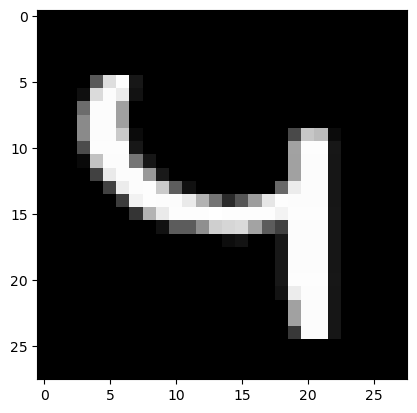

In [7]:
#Affichage de la 3ème image
n = 360
Y0_ = pd.get_dummies(y_train).values
Y1_ = pd.get_dummies(y_test).values
plt.imshow(x_test[n, :].reshape(28, 28), cmap="gray")

In [8]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_train)
X_train_std = std_scale.transform(x_train)
X_test_std = std_scale.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [11]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### prendre photo

In [59]:
import cv2

import math

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

 
while True:
    ret, frame = cam.read()

 

    if not ret:
        print("failed to grab frame")

        break

    WIDTH = cam.get(cv2.CAP_PROP_FRAME_WIDTH)
    HEIGHT = cam.get(cv2.CAP_PROP_FRAME_HEIGHT)
    center_x = int(WIDTH // 2)
    center_y = int(HEIGHT // 2)            
    crosshair_length = 20
    color = (255, 0, 0)  # Blue color
    cv2.line(frame, (center_x - crosshair_length, center_y), (center_x + crosshair_length, center_y), color, 2)
    cv2.line(frame, (center_x, center_y - crosshair_length), (center_x, center_y + crosshair_length), color, 2)
            
            
    cv2.imshow('test', frame)
    k = cv2.waitKey(1)


    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

 
    elif k%256 == 32:

 

        # SPACE pressed

        img_name = "opencv_frame_{}.png".format(img_counter)

        cv2.imwrite(img_name, frame)

        print("{} written!".format(img_name))

        img_counter += 1

 

 

cam.release()

cv2.destroyAllWindows()

opencv_frame_0.png written!
Escape hit, closing...


### mettre en negatif et afficher photo 

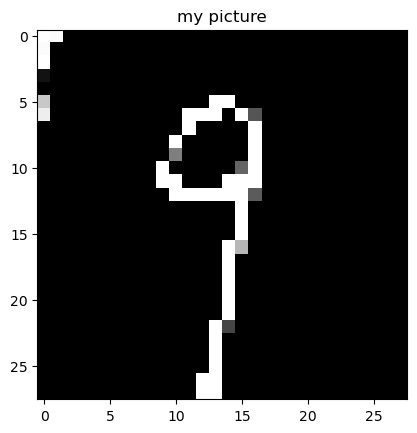

In [60]:
img = cv2.imread('opencv_frame_0.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

img_not = cv2.bitwise_not(blackAndWhiteImage)

img = img.astype('float32')

img = cv2.resize(img_not, (28,28))


plt.imshow(img, cmap = 'gray')
plt.title('my picture')
plt.show()

### algo reconnait chiffre photo et dis le chiffre

In [61]:
img = img / 255
y_pred = knn.predict(img.reshape(1,-1))
y_pred[0]

import pyttsx3

engine = pyttsx3.init()
engine.say("Je pense que c'est un" + str(y_pred[0]))
engine.runAndWait()
